In [50]:
import numpy as np
import h5py
import matplotlib.pylab as plt
from scipy.signal import convolve2d
%matplotlib inline

nmecdata = h5py.File('nmecdata/flat_nmec_bin_uint8.hdf5')

im = nmecdata['FR-005-007.bin.tif'].value
im = 1.0 - im/255.0

heat2d = np.zeros(im.shape)
for i in xrange(len(im)):
    heat2d[i,:] = np.convolve(im[i], np.ones(56), mode='same')

im = im.T
heat2d = heat2d.T
for i in xrange(len(im)):
    heat2d[i,:] = np.convolve(im[i], np.ones(56), mode='same')

im = im.T
heat2d = heat2d.T

print "All done with "+str(im.shape)

All done with (3300, 2550)


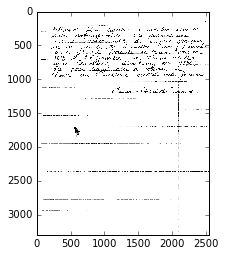

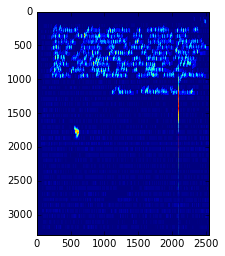

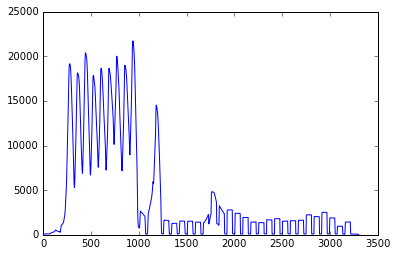

In [51]:
plt.imshow(1-im, cmap='gray')
plt.figure()
plt.imshow(heat2d)
plt.figure()
plt.plot(heat2d.sum(axis=1))